In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [55]:
# Load the dataset
file_path = 'SSH.csv'  # Path to the dataset
df = pd.read_csv(file_path)
df.head(50)

,user,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td,ts,class
0,kamran,1,1,0,1,0,1,0,2,1,0,1544678520,0
1,kamran,1,1,0,1,0,2,0,3,0,18,1544678538,0
2,student,1,0,0,1,0,0,1,0,0,133,1544678671,0
3,kamran,1,1,0,1,0,1,1,2,0,58,1544678729,0
4,kamran,1,1,0,1,0,2,1,3,0,29,1544678758,0
5,root,1,1,1,1,0,3,1,5,0,146,1544678904,0
6,root,1,1,1,1,0,4,1,6,0,32,1544678936,0
7,root,1,1,1,1,0,5,1,7,0,0,1544678936,1
8,kamran,1,1,0,1,0,6,1,9,0,21,1544678957,1
9,kamran,1,1,0,1,0,7,1,10,0,30,1544678987,1


In [56]:
# Preprocess the data (drop unnecessary columns)
df.drop(columns=['user', 'ts', 'td'], inplace=True)  # Dropping 'user', 'ts', and 'td' columns

In [57]:
# Separate features and labels
X = df.drop('class', axis=1)  # Features (all columns except 'class')
y = df['class']  # Labels (malicious or benign)

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [59]:
svm_model = SVC(kernel='linear', probability=True)  # Linear kernel for SVM
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model using a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[26  0]
 [ 0  3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         3

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



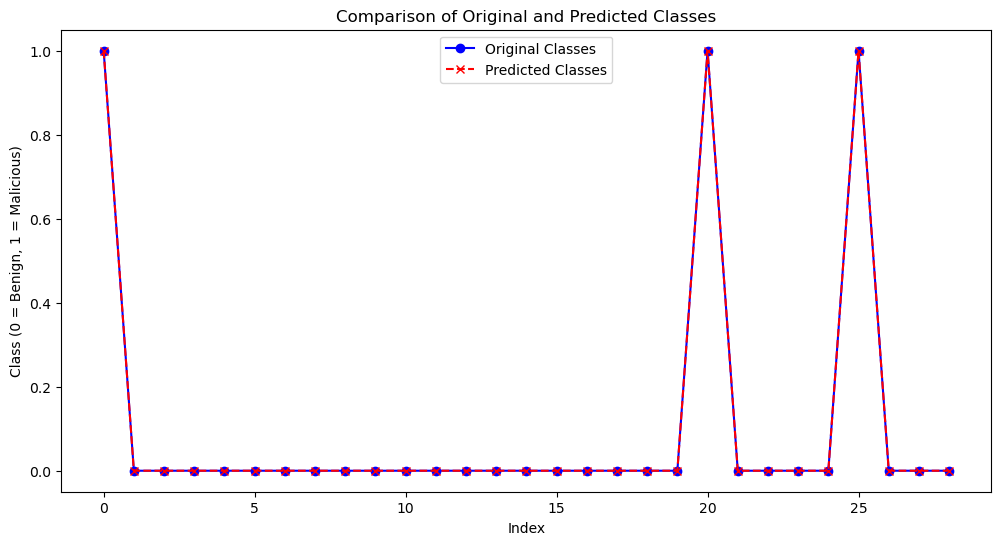

In [60]:
# Plotting the original vs predicted classes in a line graph
plt.figure(figsize=(12, 6))

# Plot original classes (y_test) and predicted classes (y_pred)
plt.plot(range(len(y_test)), y_test, label="Original Classes", marker='o', color='b')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Classes", marker='x', color='r', linestyle='--')

# Adding titles and labels
plt.title('Comparison of Original and Predicted Classes')
plt.xlabel('Index')
plt.ylabel('Class (0 = Benign, 1 = Malicious)')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MAPE
# MAPE requires division, so we avoid dividing by zero using np.clip to avoid issues.
y_test = np.array(y_test)  # convert y_test to numpy array if it's not already
y_pred = np.array(y_pred)  # convert y_pred to numpy array if it's not already
mape = np.mean(np.abs((y_test - y_pred) / np.clip(y_test, a_min=0.001, a_max=None))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0
Root Mean Squared Error (RMSE): 0.0


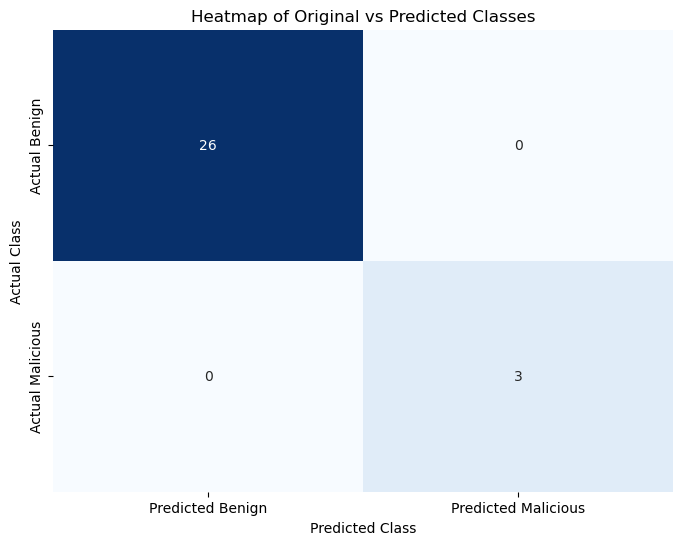

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted Benign', 'Predicted Malicious'], 
            yticklabels=['Actual Benign', 'Actual Malicious'])
plt.title('Heatmap of Original vs Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()